In [1]:
#Import the required libraries
import pandas as pd
from scipy.stats import mode
from pandas import DataFrame
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import mode
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, scale, StandardScaler
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, Ridge, Lasso
from sklearn import preprocessing
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from io import StringIO
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, KFold, cross_val_score
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import export_graphviz 
from IPython.display import Image  
import pydotplus
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score
import warnings
warnings.filterwarnings(action = 'ignore')


In [2]:
train_data = pd.read_csv('../notebook/cleaned_train_data.csv')
test_data = pd.read_csv('../notebook/cleaned_test_data.csv')

In [3]:
train_data.head()

,Unnamed: 0,donated,control_number,months_since_origin,donor_age,in_house,urbanicity,ses,cluster_code,home_owner,...,lifetime_gift_range,lifetime_max_gift_amt,lifetime_min_gift_amt,last_gift_amt,card_prom_12,number_prom_12,months_since_last_gift,months_since_first_gift,file_avg_gift,file_card_gift
0,0,0,5,101,87.0,0,X,5,54,H,...,15.0,20.0,5.0,15.0,5,12,26,92,8.49,7
1,1,1,12,137,79.0,0,R,2,45,H,...,20.0,25.0,5.0,17.0,7,21,7,122,14.72,12
2,2,0,37,113,75.0,0,S,1,11,H,...,23.0,28.0,5.0,19.0,11,32,6,105,16.75,16
3,3,0,38,92,60.0,0,U,2,4,H,...,14.0,17.0,3.0,15.0,11,33,6,92,11.76,12
4,4,0,41,101,74.0,0,R,2,49,U,...,20.0,25.0,5.0,25.0,6,19,18,92,8.83,3


In [4]:
test_data

,Unnamed: 0,control_number,months_since_origin,donor_age,in_house,urbanicity,ses,cluster_code,home_owner,donor_gender,...,lifetime_gift_range,lifetime_max_gift_amt,lifetime_min_gift_amt,last_gift_amt,card_prom_12,number_prom_12,months_since_last_gift,months_since_first_gift,file_avg_gift,file_card_gift
0,0,139,101,59.0,0,R,2,46,U,F,...,16.0,21.0,5.0,21.0,4,10,26,90,14.71,2
1,1,142,137,59.0,0,R,2,43,U,F,...,9.0,11.0,2.0,10.0,9,22,22,129,6.00,14
2,2,282,17,30.0,0,T,1,35,H,M,...,15.0,20.0,5.0,20.0,5,14,20,87,8.44,1
3,3,368,137,75.0,0,U,1,2,H,M,...,5.0,10.0,5.0,10.0,10,24,19,129,6.50,22
4,4,387,5,59.0,0,T,2,40,U,F,...,7.0,10.0,3.0,5.0,5,12,18,85,5.83,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2143,2143,190842,101,47.0,1,C,1,24,U,F,...,16.0,17.0,1.0,17.0,5,10,26,101,11.44,7
2144,2144,191056,41,17.0,1,U,1,1,U,M,...,24.0,44.0,20.0,32.0,5,18,26,44,28.83,2
2145,2145,191164,89,55.0,0,X,5,54,U,F,...,9.0,12.0,3.0,10.0,6,13,18,81,8.41,8
2146,2146,191484,65,42.0,1,X,5,54,U,F,...,5.0,20.0,15.0,20.0,6,13,18,56,18.33,1


In [5]:
def drop_column(column_name, data):
    dropped_data = data.drop([column_name], axis = 1) 
    return dropped_data

In [6]:
train_control_no = train_data.control_number
train_data = drop_column('control_number',train_data)
test_control_no = test_data.control_number
test_data = drop_column('control_number',test_data)

In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19372 entries, 0 to 19371
Data columns (total 49 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   19372 non-null  int64  
 1   donated                      19372 non-null  int64  
 2   months_since_origin          19372 non-null  int64  
 3   donor_age                    19372 non-null  float64
 4   in_house                     19372 non-null  int64  
 5   urbanicity                   19372 non-null  object 
 6   ses                          19372 non-null  int64  
 7   cluster_code                 19372 non-null  int64  
 8   home_owner                   19372 non-null  object 
 9   donor_gender                 19372 non-null  object 
 10  income_group                 19372 non-null  float64
 11  published_phone              19372 non-null  int64  
 12  overlay_source               19372 non-null  object 
 13  mor_hit_rate    

In [8]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2148 entries, 0 to 2147
Data columns (total 48 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   2148 non-null   int64  
 1   months_since_origin          2148 non-null   int64  
 2   donor_age                    2148 non-null   float64
 3   in_house                     2148 non-null   int64  
 4   urbanicity                   2148 non-null   object 
 5   ses                          2148 non-null   int64  
 6   cluster_code                 2148 non-null   int64  
 7   home_owner                   2148 non-null   object 
 8   donor_gender                 2148 non-null   object 
 9   income_group                 2148 non-null   float64
 10  published_phone              2148 non-null   int64  
 11  overlay_source               2148 non-null   object 
 12  mor_hit_rate                 2148 non-null   int64  
 13  wealth_rating     

In [9]:
train_data.drop("Unnamed: 0", axis=1, inplace=True)
test_data.drop("Unnamed: 0", axis=1, inplace=True)

In [10]:
train_data.shape, test_data.shape

((19372, 48), (2148, 47))

In [11]:
donated = train_data[train_data['donated']==1]
not_donated = train_data[train_data['donated']==0]
donor_count = train_data['donated'].value_counts()[1]
random_selection = not_donated.sample(donor_count)
train_data_under_sampled = pd.concat([donated, random_selection])

In [12]:
train_data_under_sampled.shape

(9686, 48)

In [13]:
train_data_under_sampled['donated'].value_counts()

1    4843
0    4843
Name: donated, dtype: int64

In [14]:
# Selecting the independent variables and the target variable
#
y = train_data['donated']
X = train_data.drop('donated', axis = 1)


* **Joining the Train and Test data to encode the categorical columns together**

In [15]:
total_data = pd.concat([X, test_data])

In [16]:
df_numerical = total_data.select_dtypes(include = [np.number])

In [17]:
df_categorical = total_data.select_dtypes(include = [object])

In [18]:
df_categorical = df_categorical.apply(lambda x: x.astype('category'))

In [19]:
df_categorical.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21520 entries, 0 to 2147
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   urbanicity           21520 non-null  category
 1   home_owner           21520 non-null  category
 2   donor_gender         21520 non-null  category
 3   overlay_source       21520 non-null  category
 4   recency_status_96nk  21520 non-null  category
dtypes: category(5)
memory usage: 273.9 KB


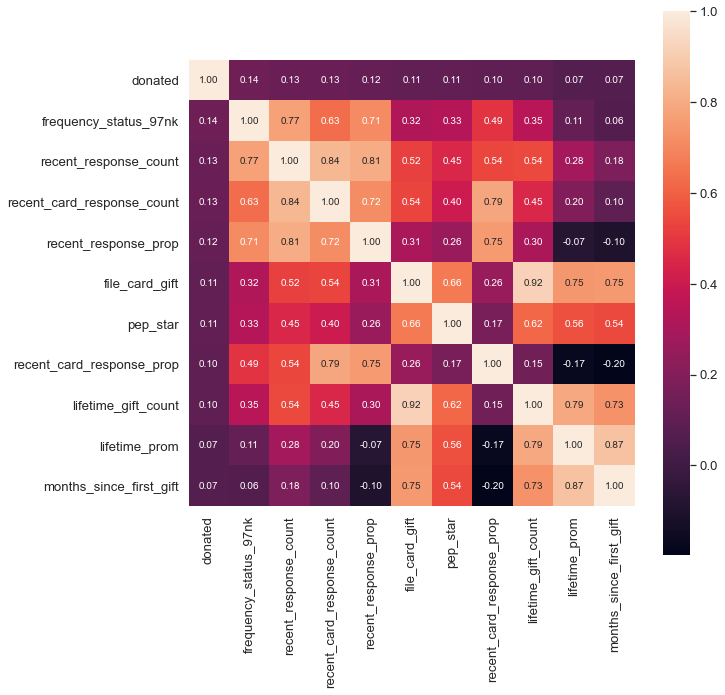

In [20]:
corrmatrix = train_data.corr()
k = 11 #number of variables for heatmap
cols = corrmatrix.nlargest(k, 'donated')['donated'].index
cm = np.corrcoef(train_data[cols].values.T)
plt.figure(figsize=(10, 10))
sns.set(font_scale=1.20)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, 
                 xticklabels=cols.values)
plt.show()

In [21]:
train_data.shape

(19372, 48)

In [22]:
train_data.columns.to_list()

['donated',
 'months_since_origin',
 'donor_age',
 'in_house',
 'urbanicity',
 'ses',
 'cluster_code',
 'home_owner',
 'donor_gender',
 'income_group',
 'published_phone',
 'overlay_source',
 'mor_hit_rate',
 'wealth_rating',
 'median_home_value',
 'median_household_income',
 'pct_owner_occupied',
 'per_capita_income',
 'pct_attribute1',
 'pct_attribute2',
 'pct_attribute3',
 'pct_attribute4',
 'pep_star',
 'recent_star_status',
 'recency_status_96nk',
 'frequency_status_97nk',
 'recent_response_prop',
 'recent_avg_gift_amt',
 'recent_card_response_prop',
 'recent_avg_card_gift_amt',
 'recent_response_count',
 'recent_card_response_count',
 'months_since_last_prom_resp',
 'lifetime_card_prom',
 'lifetime_prom',
 'lifetime_gift_amount',
 'lifetime_gift_count',
 'lifetime_avg_gift_amt',
 'lifetime_gift_range',
 'lifetime_max_gift_amt',
 'lifetime_min_gift_amt',
 'last_gift_amt',
 'card_prom_12',
 'number_prom_12',
 'months_since_last_gift',
 'months_since_first_gift',
 'file_avg_gift',
 

In [23]:
df_categorical.shape

(21520, 5)

In [24]:
df_categorical.head()

,urbanicity,home_owner,donor_gender,overlay_source,recency_status_96nk
0,X,H,M,P,A
1,R,H,M,P,S
2,S,H,F,P,S
3,U,H,F,B,A
4,R,U,F,B,A


In [25]:

total_data=pd.get_dummies(total_data,drop_first=True)

In [26]:
total_data.head()

,months_since_origin,donor_age,in_house,ses,cluster_code,income_group,published_phone,mor_hit_rate,wealth_rating,median_home_value,...,home_owner_U,donor_gender_M,donor_gender_U,overlay_source_M,overlay_source_P,recency_status_96nk_E,recency_status_96nk_F,recency_status_96nk_L,recency_status_96nk_N,recency_status_96nk_S
0,101,87.0,0,5,54,2.0,0,0,5.0,554,...,0,1,0,0,1,0,0,0,0,0
1,137,79.0,0,2,45,7.0,0,0,3.0,334,...,0,1,0,0,1,0,0,0,0,1
2,113,75.0,0,1,11,5.0,0,0,9.0,2388,...,0,0,0,0,1,0,0,0,0,1
3,92,60.0,0,2,4,6.0,1,0,4.0,1688,...,0,0,0,0,0,0,0,0,0,0
4,101,74.0,0,2,49,2.0,1,8,5.0,514,...,1,0,0,0,0,0,0,0,0,0


In [27]:
total_data.shape

(21520, 57)

In [28]:
total_data.columns.to_list()

['months_since_origin',
 'donor_age',
 'in_house',
 'ses',
 'cluster_code',
 'income_group',
 'published_phone',
 'mor_hit_rate',
 'wealth_rating',
 'median_home_value',
 'median_household_income',
 'pct_owner_occupied',
 'per_capita_income',
 'pct_attribute1',
 'pct_attribute2',
 'pct_attribute3',
 'pct_attribute4',
 'pep_star',
 'recent_star_status',
 'frequency_status_97nk',
 'recent_response_prop',
 'recent_avg_gift_amt',
 'recent_card_response_prop',
 'recent_avg_card_gift_amt',
 'recent_response_count',
 'recent_card_response_count',
 'months_since_last_prom_resp',
 'lifetime_card_prom',
 'lifetime_prom',
 'lifetime_gift_amount',
 'lifetime_gift_count',
 'lifetime_avg_gift_amt',
 'lifetime_gift_range',
 'lifetime_max_gift_amt',
 'lifetime_min_gift_amt',
 'last_gift_amt',
 'card_prom_12',
 'number_prom_12',
 'months_since_last_gift',
 'months_since_first_gift',
 'file_avg_gift',
 'file_card_gift',
 'urbanicity_R',
 'urbanicity_S',
 'urbanicity_T',
 'urbanicity_U',
 'urbanicity_X',

In [29]:
total_data.shape

(21520, 57)

In [30]:
total_data.dtypes

months_since_origin              int64
donor_age                      float64
in_house                         int64
ses                              int64
cluster_code                     int64
income_group                   float64
published_phone                  int64
mor_hit_rate                     int64
wealth_rating                  float64
median_home_value                int64
median_household_income          int64
pct_owner_occupied               int64
per_capita_income                int64
pct_attribute1                   int64
pct_attribute2                   int64
pct_attribute3                   int64
pct_attribute4                   int64
pep_star                         int64
recent_star_status               int64
frequency_status_97nk            int64
recent_response_prop           float64
recent_avg_gift_amt            float64
recent_card_response_prop      float64
recent_avg_card_gift_amt       float64
recent_response_count            int64
recent_card_response_coun

In [31]:
independent_variables = ['months_since_origin',
 'donor_age',
 'in_house',
 'ses',
 'cluster_code',
 'income_group',
 'published_phone',
 'mor_hit_rate',
 'wealth_rating',
 'median_home_value',
 'median_household_income',
 'pct_owner_occupied',
 'per_capita_income',
 'pct_attribute1',
 'pct_attribute2',
 'pct_attribute3',
 'pct_attribute4',
 'pep_star',
 'recent_star_status',
 'frequency_status_97nk',
 'recent_response_prop',
 'recent_avg_gift_amt',
 'recent_card_response_prop',
 'recent_avg_card_gift_amt',
 'recent_response_count',
 'recent_card_response_count',
 'months_since_last_prom_resp',
 'lifetime_card_prom',
 'lifetime_prom',
 'lifetime_gift_amount',
 'lifetime_gift_count',
 'lifetime_avg_gift_amt',
 'lifetime_gift_range',
 'lifetime_max_gift_amt',
 'lifetime_min_gift_amt',
 'last_gift_amt',
 'card_prom_12',
 'number_prom_12',
 'months_since_last_gift',
 'months_since_first_gift',
 'file_avg_gift',
 'file_card_gift',
 'urbanicity_R',
 'urbanicity_S',
 'urbanicity_T',
 'urbanicity_U',
 'urbanicity_X',
 'home_owner_U',
 'donor_gender_M',
 'donor_gender_U',
 'overlay_source_M',
 'overlay_source_P',
 'recency_status_96nk_E',
 'recency_status_96nk_F',
 'recency_status_96nk_L',
 'recency_status_96nk_N',
 'recency_status_96nk_S']

#### Split the data into test and train data sets
It is extremely important to split the data into train and test sets. Train set is used to train the model and Test set is used to test the performance of the model.

Problems encountered if train test split not performed:

It does not make sense to talk about the performance of the model by testing it on same data. The model learns the data pretty well and when tested on same data will produce the best score.
The model becomes very specific to the training data, so far as they even get trained on the ocassional erroneous labels present in the training data. This results in Overfitting and the model might not work well outside the training data.
Therefore it is advised to keep a certian portion of the data aside (test set) untouched and test our model on this data to evaluate the true performance of the model.



In [32]:
X =  total_data.iloc[:19372]
X_test_cat_encoded =  total_data.iloc[19372:]
X.shape, X_test_cat_encoded.shape, y.shape

((19372, 57), (2148, 57), (19372,))

In [34]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.3, random_state=101)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(13560, 57)
(5812, 57)
(13560,)
(5812,)


In [35]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [36]:
thresh = 10
for i in np.arange(0,len(independent_variables)):
    vif = [variance_inflation_factor(X[independent_variables].values, ix) 
    for ix in range(X[independent_variables].shape[1])]
    maxloc = vif.index(max(vif))
    if max(vif) > thresh:
        print ("vif :", vif)
        print('dropping \'' + X[independent_variables].columns[maxloc] + '\' at index: ' + str(maxloc))
        del independent_variables[maxloc]
    else:
        break
print ('Final variables:', independent_variables)


vif : [195.79813615207482, 18.88527902289004, 2.023705068597939, 42.691344018205285, 296.0321622583407, 9.185098649302834, 2.8109915735386246, 1.28121569378032, 9.489961567511378, 6.357111766443386, 32.96222382657267, 23.64516815498198, 18.734553605291648, 1.1098356937556784, 13.425774015494728, 7.961461062295857, 8.828346179841759, 4.603973631395305, 1.5749428620364105, 14.207297117440248, 44.27951502836778, 16.364885654246716, 25.035169785213508, 5.194310281246458, 57.06141704460149, 31.940193712877583, 70.82835820087679, 233.27878548541315, 208.4878962662371, 9.11009778778154, 32.60142377757347, inf, inf, inf, inf, 11.78293820942413, 76.73381966674931, 53.61752146880971, 58.201622058043796, 209.20337617080602, inf, 32.85700096779523, 25.551476389594196, 8.65196028886424, 9.769312237960943, 18.9530615542693, 3.67736107952547, 3.2851820335613655, 1.7925347023442992, 1.146938791414657, 3.2691095333602957, 2.0779439496868335, 1.7212051553727084, 2.3797601911344635, 1.0289621856805404, 1

* **We can notice that VIF analysis has eliminated several features**.
* **Let’s run the first iteration of multivariate regression model with the set of independent variables that has passed the VIF analysis.**

In [37]:
print(independent_variables)

['in_house', 'ses', 'income_group', 'published_phone', 'mor_hit_rate', 'wealth_rating', 'median_home_value', 'pct_attribute1', 'pct_attribute3', 'pct_attribute4', 'pep_star', 'recent_star_status', 'frequency_status_97nk', 'recent_card_response_prop', 'recent_avg_card_gift_amt', 'lifetime_gift_amount', 'lifetime_gift_count', 'lifetime_max_gift_amt', 'lifetime_min_gift_amt', 'last_gift_amt', 'urbanicity_R', 'urbanicity_S', 'urbanicity_T', 'urbanicity_U', 'urbanicity_X', 'home_owner_U', 'donor_gender_M', 'donor_gender_U', 'overlay_source_M', 'overlay_source_P', 'recency_status_96nk_E', 'recency_status_96nk_F', 'recency_status_96nk_L', 'recency_status_96nk_N', 'recency_status_96nk_S']


In [38]:
# independent_variables =  ['months_since_origin', 'in_house', 'ses', 'income_group', 'published_phone', 'mor_hit_rate', 
# 'wealth_rating', 'median_home_value', 'pct_attribute1', 'pct_attribute3', 'pct_attribute4', 'pep_star', 'recent_star_status',
# 'frequency_status_97nk', 'recent_avg_card_gift_amt', 'recent_card_response_count', 'lifetime_gift_amount', 'lifetime_max_gift_amt', 
# 'lifetime_min_gift_amt', 'last_gift_amt', 'urbanicity_R', 'urbanicity_S', 'urbanicity_T', 'urbanicity_U', 'urbanicity_X', 
# 'home_owner_U', 'donor_gender_M', 'donor_gender_U', 'overlay_source_M', 'overlay_source_P', 'recency_status_96nk_E', 
# 'recency_status_96nk_F', 'recency_status_96nk_L', 'recency_status_96nk_N', 'recency_status_96nk_S']
# use the list to select a subset from original DataFrame
X = X[independent_variables]
X_test_cat_encoded = X_test_cat_encoded[independent_variables]
y = y
X.shape, y.shape, X_test_cat_encoded.shape

((19372, 35), (19372,), (2148, 35))

In [39]:
X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.3, random_state=101)

In [40]:

# define and configure the model
model = KNeighborsClassifier()
# fit the model
model.fit(X_train, y_train)
# evaluate the model
preds = model.predict(X_test)
print('Accuracy : ',accuracy_score(y_test, preds))

# Measuring the accuracy of the model
#
print(f'The accuracy score is: {accuracy_score(y_test, preds)} and the f1 score is {f1_score(y_test, preds)}')
print('\n')
print(f'{classification_report(y_test, preds)}')
confusion_matrix(y_test, preds)


Accuracy :  0.6952856159669649
The accuracy score is: 0.6952856159669649 and the f1 score is 0.16971401781528367


              precision    recall  f1-score   support

           0       0.76      0.88      0.81      4398
           1       0.25      0.13      0.17      1414

    accuracy                           0.70      5812
   macro avg       0.50      0.50      0.49      5812
weighted avg       0.63      0.70      0.66      5812



array([[3860,  538],
       [1233,  181]], dtype=int64)

In [41]:

# define and configure the model
model = DecisionTreeClassifier()
# fit the model
model.fit(X_train, y_train)
# evaluate the model
preds = model.predict(X_test)
print('Accuracy : ',accuracy_score(y_test, preds))

print(f'The accuracy score is: {accuracy_score(y_test, preds)} and the f1 score is {f1_score(y_test, preds)}')
print('\n')
print(f'{classification_report(y_test, preds)}')
confusion_matrix(y_test, preds)


Accuracy :  0.622849277357192
The accuracy score is: 0.622849277357192 and the f1 score is 0.26244952893674295


              precision    recall  f1-score   support

           0       0.76      0.73      0.75      4398
           1       0.25      0.28      0.26      1414

    accuracy                           0.62      5812
   macro avg       0.50      0.51      0.50      5812
weighted avg       0.64      0.62      0.63      5812



array([[3230, 1168],
       [1024,  390]], dtype=int64)

In [42]:
# Checking for the most important features that contribute most in predicting the target
# Creating a dataframe of features and their respective importances
#
dc_impo_df = pd.DataFrame({'feature': X.columns, 'importance': np.round(model.feature_importances_, 4)}).set_index('feature').sort_values(by = 'importance', ascending = False)
dc_impo_df


,importance
feature,
median_home_value,0.1372
lifetime_gift_amount,0.0895
pct_attribute4,0.0863
pct_attribute3,0.0846
recent_card_response_prop,0.0610
recent_avg_card_gift_amt,0.0559
lifetime_gift_count,0.0543
mor_hit_rate,0.0409
income_group,0.0408


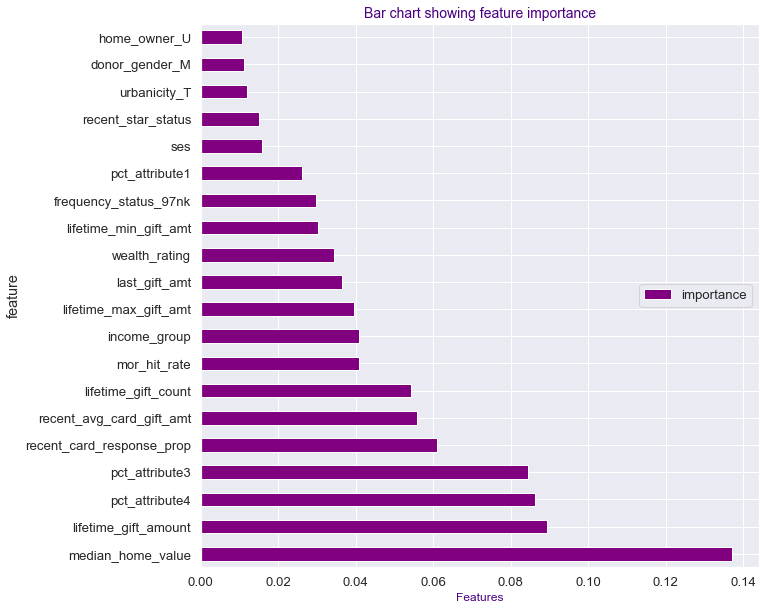

In [43]:
# Creating a bar chart of feature importance in descending order
#
dc_impo_df = dc_impo_df[:20].sort_values(by = 'importance', ascending = False)
dc_impo_df.plot(kind = 'barh', figsize = (10, 10), color = 'purple')
plt.legend(loc = 'center right')
plt.title('Bar chart showing feature importance', color = 'indigo', fontsize = 14)
plt.xlabel('Features', fontsize = 12, color = 'indigo')
plt.show()

In [44]:

# define and configure the model
model = XGBClassifier()
# fit the model
model.fit(X_train, y_train)
# evaluate the model
preds = model.predict(X_test)
print('Accuracy : ',accuracy_score(y_test, preds))

print(f'The accuracy score is: {accuracy_score(y_test, preds)} and the f1 score is {f1_score(y_test, preds)}')
print('\n')
print(f'{classification_report(y_test, preds)}')
confusion_matrix(y_test, preds)

[10:48:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy :  0.7410529938059188
The accuracy score is: 0.7410529938059188 and the f1 score is 0.16620498614958448


              precision    recall  f1-score   support

           0       0.77      0.95      0.85      4398
           1       0.38      0.11      0.17      1414

    accuracy                           0.74      5812
   macro avg       0.58      0.53      0.51      5812
weighted avg       0.67      0.74      0.68      5812



array([[4157,  241],
       [1264,  150]], dtype=int64)

In [45]:
# Checking for the most important features that contribute most in predicting the target
# Creating a dataframe of features and their respective importances
#
impo_df = pd.DataFrame({'feature': X.columns, 'importance': np.round(model.feature_importances_, 4)}).set_index('feature').sort_values(by = 'importance', ascending = False)
impo_df


,importance
feature,
frequency_status_97nk,0.0802
pep_star,0.0458
in_house,0.0356
recency_status_96nk_E,0.0349
lifetime_gift_count,0.0336
urbanicity_U,0.0321
recency_status_96nk_S,0.0315
last_gift_amt,0.0307
recent_card_response_prop,0.0299


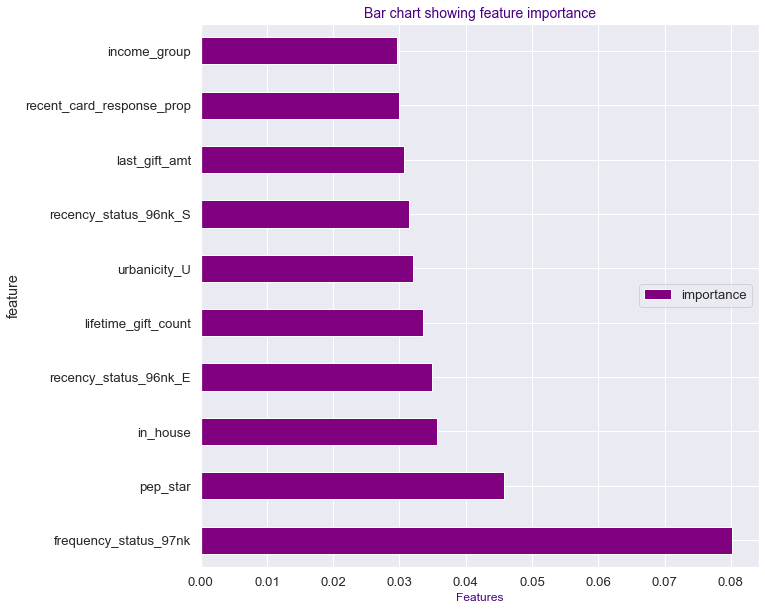

In [46]:
# Creating a bar chart of feature importance in descending order
#
impo_df = impo_df[:10].sort_values(by = 'importance', ascending = False)
impo_df.plot(kind = 'barh', figsize = (10, 10), color = 'purple')
plt.legend(loc = 'center right')
plt.title('Bar chart showing feature importance', color = 'indigo', fontsize = 14)
plt.xlabel('Features', fontsize = 12, color = 'indigo')
plt.show()

In [47]:
# define and configure the model
model = CatBoostClassifier(verbose=False)

# fit the model
model.fit(X_train, y_train)

# evaluate the model
preds = model.predict(X_test)
print('Accuracy : ',accuracy_score(y_test, preds))

print(f'The accuracy score is: {accuracy_score(y_test, preds)} and the f1 score is {f1_score(y_test, preds)}')
print('\n')
print(f'{classification_report(y_test, preds)}')
confusion_matrix(y_test, preds)


Accuracy :  0.7543014452856159
The accuracy score is: 0.7543014452856159 and the f1 score is 0.08812260536398468


              precision    recall  f1-score   support

           0       0.76      0.98      0.86      4398
           1       0.45      0.05      0.09      1414

    accuracy                           0.75      5812
   macro avg       0.61      0.51      0.47      5812
weighted avg       0.69      0.75      0.67      5812



array([[4315,   83],
       [1345,   69]], dtype=int64)

In [48]:
# Checking for the most important features that contribute most in predicting the target
# Creating a dataframe of features and their respective importances
#
impo_df = pd.DataFrame({'feature': X.columns, 'importance': np.round(model.feature_importances_, 4)}).set_index('feature').sort_values(by = 'importance', ascending = False)
impo_df



,importance
feature,
median_home_value,9.8760
pct_attribute4,8.1783
lifetime_gift_amount,7.6272
pct_attribute3,6.9397
recent_avg_card_gift_amt,5.3190
recent_card_response_prop,5.3144
last_gift_amt,5.2271
lifetime_max_gift_amt,5.1217
lifetime_gift_count,4.8975


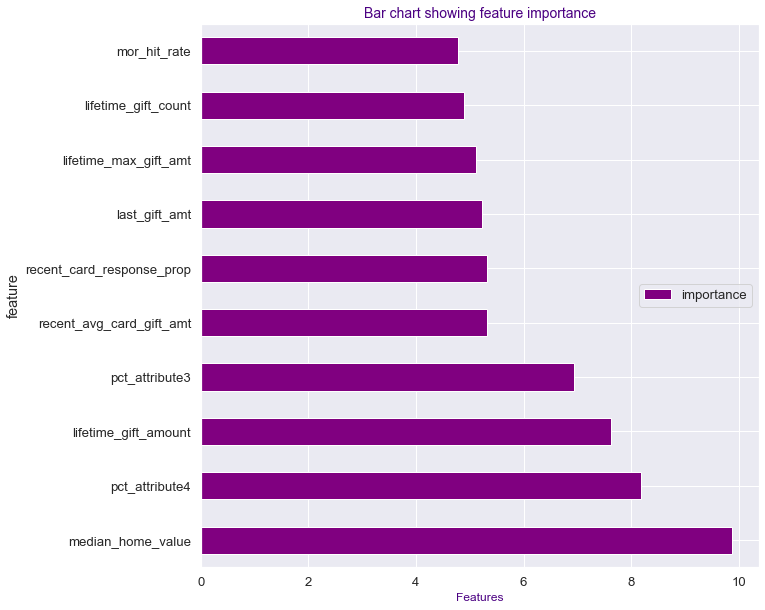

In [49]:
# Creating a bar chart of feature importance in descending order
#
impo_df = impo_df[:10].sort_values(by = 'importance', ascending = False)
impo_df.plot(kind = 'barh', figsize = (10, 10), color = 'purple')
plt.legend(loc = 'center right')
plt.title('Bar chart showing feature importance', color = 'indigo', fontsize = 14)
plt.xlabel('Features', fontsize = 12, color = 'indigo')
plt.show()

In [50]:

# define and configure the model

model = LogisticRegression()
# fit the model
model.fit(X_train, y_train)

# evaluate the model
preds = model.predict(X_test)
print('Accuracy : ',accuracy_score(y_test, preds))

print(f'The accuracy score is: {accuracy_score(y_test, preds)} and the f1 score is {f1_score(y_test, preds)}')
print('\n')
print(f'{classification_report(y_test, preds)}')
confusion_matrix(y_test, preds)

Accuracy :  0.7555058499655884
The accuracy score is: 0.7555058499655884 and the f1 score is 0.002807017543859649


              precision    recall  f1-score   support

           0       0.76      1.00      0.86      4398
           1       0.18      0.00      0.00      1414

    accuracy                           0.76      5812
   macro avg       0.47      0.50      0.43      5812
weighted avg       0.62      0.76      0.65      5812



array([[4389,    9],
       [1412,    2]], dtype=int64)

In [51]:
# define and configure the model
model = AdaBoostClassifier()

# fit the model
model.fit(X_train, y_train)

# evaluate the model
preds = model.predict(X_test)
print('Accuracy : ',accuracy_score(y_test, preds))

print(f'The accuracy score is: {accuracy_score(y_test, preds)} and the f1 score is {f1_score(y_test, preds)}')
print('\n')
print(f'{classification_report(y_test, preds)}')
confusion_matrix(y_test, preds)


Accuracy :  0.7529249827942188
The accuracy score is: 0.7529249827942188 and the f1 score is 0.040106951871657755


              precision    recall  f1-score   support

           0       0.76      0.99      0.86      4398
           1       0.37      0.02      0.04      1414

    accuracy                           0.75      5812
   macro avg       0.56      0.50      0.45      5812
weighted avg       0.66      0.75      0.66      5812



array([[4346,   52],
       [1384,   30]], dtype=int64)

In [52]:
# Checking for the most important features that contribute most in predicting the target
# Creating a dataframe of features and their respective importances
#
impo_df = pd.DataFrame({'feature': X.columns, 'importance': np.round(model.feature_importances_, 4)}).set_index('feature').sort_values(by = 'importance', ascending = False)
impo_df


,importance
feature,
median_home_value,0.10
pct_attribute4,0.10
frequency_status_97nk,0.10
lifetime_gift_amount,0.10
mor_hit_rate,0.08
last_gift_amt,0.08
lifetime_max_gift_amt,0.06
pct_attribute3,0.04
lifetime_min_gift_amt,0.04


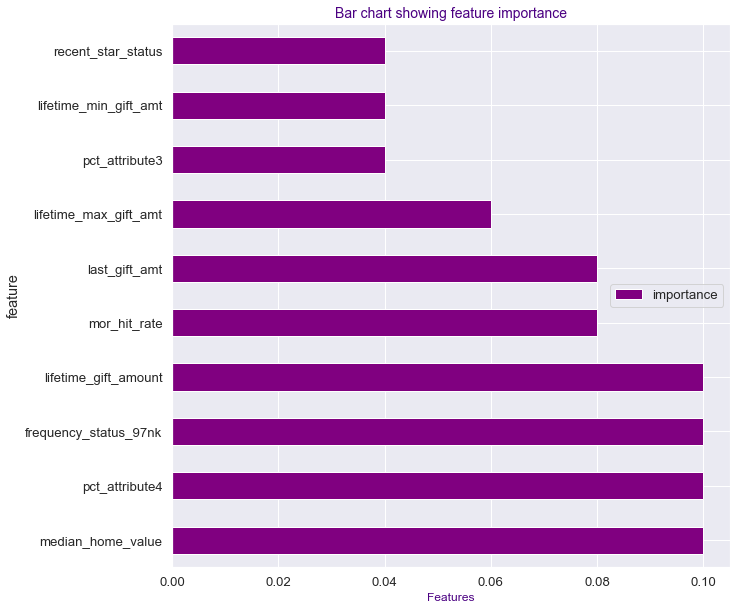

In [53]:
# Creating a bar chart of feature importance in descending order
#
impo_df = impo_df[:10].sort_values(by = 'importance', ascending = False)
impo_df.plot(kind = 'barh', figsize = (10, 10), color = 'purple')
plt.legend(loc = 'center right')
plt.title('Bar chart showing feature importance', color = 'indigo', fontsize = 14)
plt.xlabel('Features', fontsize = 12, color = 'indigo')
plt.show()

In [54]:
# define and configure the model
model = RandomForestClassifier()

# fit the model
model.fit(X_train, y_train)

# evaluate the model
preds = model.predict(X_test)
print('Accuracy : ',accuracy_score(y_test, preds))

print(f'The accuracy score is: {accuracy_score(y_test, preds)} and the f1 score is {f1_score(y_test, preds)}')
print('\n')
print(f'{classification_report(y_test, preds)}')
confusion_matrix(y_test, preds)


Accuracy :  0.7570543702684102
The accuracy score is: 0.7570543702684102 and the f1 score is 0.06982872200263504


              precision    recall  f1-score   support

           0       0.76      0.99      0.86      4398
           1       0.51      0.04      0.07      1414

    accuracy                           0.76      5812
   macro avg       0.64      0.51      0.47      5812
weighted avg       0.70      0.76      0.67      5812



array([[4347,   51],
       [1361,   53]], dtype=int64)

In [55]:
# Checking for the most important features that contribute most in predicting the target
# Creating a dataframe of features and their respective importances
#
rf_impo_df = pd.DataFrame({'feature': X.columns, 'importance': np.round(model.feature_importances_, 4)}).set_index('feature').sort_values(by = 'importance', ascending = False)
rf_impo_df


,importance
feature,
median_home_value,0.0961
pct_attribute4,0.0802
pct_attribute3,0.0794
lifetime_gift_amount,0.0779
recent_card_response_prop,0.0582
recent_avg_card_gift_amt,0.0576
lifetime_gift_count,0.0569
last_gift_amt,0.0493
lifetime_max_gift_amt,0.0468


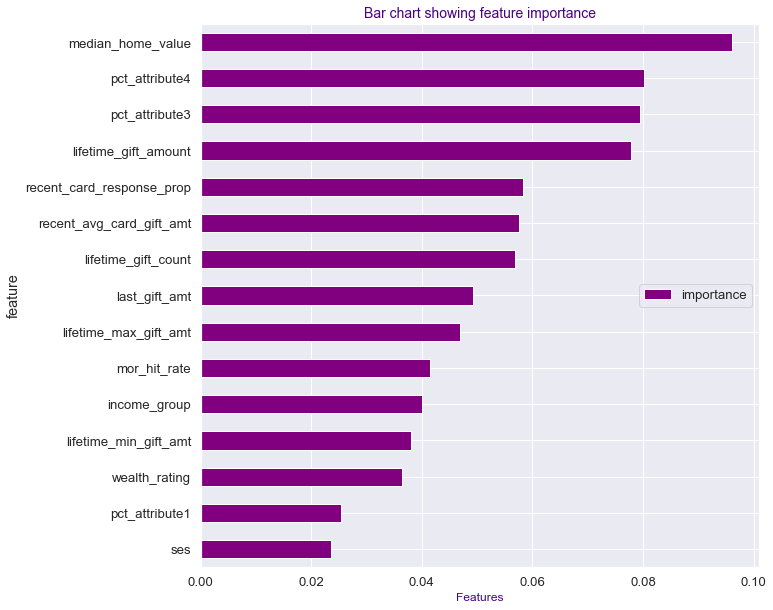

In [56]:
# Creating a bar chart of feature importance in descending order
#
rf_impo_df = rf_impo_df[:15].sort_values(by = 'importance', ascending = True)
rf_impo_df.plot(kind = 'barh', figsize = (10, 10), color = 'purple')
plt.legend(loc = 'center right')
plt.title('Bar chart showing feature importance', color = 'indigo', fontsize = 14)
plt.xlabel('Features', fontsize = 12, color = 'indigo')
plt.show()

### Using the most important features to build a random forest model

In [57]:
rf_impo_df.index

Index(['ses', 'pct_attribute1', 'wealth_rating', 'lifetime_min_gift_amt',
       'income_group', 'mor_hit_rate', 'lifetime_max_gift_amt',
       'last_gift_amt', 'lifetime_gift_count', 'recent_avg_card_gift_amt',
       'recent_card_response_prop', 'lifetime_gift_amount', 'pct_attribute3',
       'pct_attribute4', 'median_home_value'],
      dtype='object', name='feature')

# Data Modelling

## Random Forest Classifier

### Remodelling with the most important features only

In [58]:
# Selecting only important features and the y variable
#
X = X[rf_impo_df.index]

y = y


In [59]:
X.shape, y.shape

((19372, 15), (19372,))

In [60]:
# Splitting the data into training and testing sets
#
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 101)

# define and configure the model
model = RandomForestClassifier()

# fit the model
model.fit(X_train, y_train)

# evaluate the model
preds = model.predict(X_test)
print('Accuracy : ',accuracy_score(y_test, preds))

print(f'The accuracy score is: {accuracy_score(y_test, preds)} and the f1 score is {f1_score(y_test, preds)}')
print('\n')
print(f'{classification_report(y_test, preds)}')
confusion_matrix(y_test, preds)


Accuracy :  0.7506882312456985
The accuracy score is: 0.7506882312456985 and the f1 score is 0.06816720257234726


              precision    recall  f1-score   support

           0       0.76      0.98      0.86      4398
           1       0.38      0.04      0.07      1414

    accuracy                           0.75      5812
   macro avg       0.57      0.51      0.46      5812
weighted avg       0.67      0.75      0.66      5812



array([[4310,   88],
       [1361,   53]], dtype=int64)

In [61]:
# Selecting the independent variables and the target variable
#
y = train_data_under_sampled['donated']
X = train_data_under_sampled.drop('donated', axis = 1)


* **Joining the Train and Test data to encode the categorical columns together**

In [62]:
total_data = pd.concat([X, test_data])

In [63]:

total_data=pd.get_dummies(total_data,drop_first=True)

In [64]:
total_data.head()

,months_since_origin,donor_age,in_house,ses,cluster_code,income_group,published_phone,mor_hit_rate,wealth_rating,median_home_value,...,home_owner_U,donor_gender_M,donor_gender_U,overlay_source_M,overlay_source_P,recency_status_96nk_E,recency_status_96nk_F,recency_status_96nk_L,recency_status_96nk_N,recency_status_96nk_S
1,137,79.0,0,2,45,7.0,0,0,3.0,334,...,0,1,0,0,1,0,0,0,0,1
7,89,79.0,0,2,28,1.0,0,0,5.0,1004,...,0,0,0,0,1,0,0,0,0,0
9,101,63.0,0,2,43,4.0,1,0,5.0,399,...,0,0,0,0,0,0,0,0,0,1
14,137,60.0,0,2,43,5.0,1,0,1.0,475,...,1,0,0,1,0,0,0,0,0,1
16,77,81.0,0,2,45,4.0,1,24,3.0,530,...,1,1,0,0,0,0,0,0,0,0


In [65]:
total_data.shape

(11834, 57)

* **Splitting the Train and Test data to after encoding the categorical columns**

In [66]:
X_train_cat_encoded =  total_data.iloc[:9686]
X_test_cat_encoded =  total_data.iloc[9686:]
X_train_cat_encoded.shape, X_test_cat_encoded.shape

((9686, 57), (2148, 57))

In [67]:
total_data.head()

,months_since_origin,donor_age,in_house,ses,cluster_code,income_group,published_phone,mor_hit_rate,wealth_rating,median_home_value,...,home_owner_U,donor_gender_M,donor_gender_U,overlay_source_M,overlay_source_P,recency_status_96nk_E,recency_status_96nk_F,recency_status_96nk_L,recency_status_96nk_N,recency_status_96nk_S
1,137,79.0,0,2,45,7.0,0,0,3.0,334,...,0,1,0,0,1,0,0,0,0,1
7,89,79.0,0,2,28,1.0,0,0,5.0,1004,...,0,0,0,0,1,0,0,0,0,0
9,101,63.0,0,2,43,4.0,1,0,5.0,399,...,0,0,0,0,0,0,0,0,0,1
14,137,60.0,0,2,43,5.0,1,0,1.0,475,...,1,0,0,1,0,0,0,0,0,1
16,77,81.0,0,2,45,4.0,1,24,3.0,530,...,1,1,0,0,0,0,0,0,0,0


In [68]:
# Splitting the data into training and testing sets
#
X_train, X_test, y_train, y_test = train_test_split(X_train_cat_encoded, y, test_size = 0.3, random_state = 101)

In [69]:
## define and configure the model
model = RandomForestClassifier()

# fit the model
model.fit(X_train, y_train)

# evaluate the model
preds = model.predict(X_test)
print('Accuracy : ',accuracy_score(y_test, preds))

print(f'The accuracy score is: {accuracy_score(y_test, preds)} and the f1 score is {f1_score(y_test, preds)}')
print('\n')
print(f'{classification_report(y_test, preds)}')
confusion_matrix(y_test, preds)

Accuracy :  0.5726083964211975
The accuracy score is: 0.5726083964211975 and the f1 score is 0.5651260504201681


              precision    recall  f1-score   support

           0       0.57      0.59      0.58      1446
           1       0.58      0.55      0.57      1460

    accuracy                           0.57      2906
   macro avg       0.57      0.57      0.57      2906
weighted avg       0.57      0.57      0.57      2906



array([[857, 589],
       [653, 807]], dtype=int64)

In [70]:
# Checking for the most important features that contribute most in predicting the target
# Creating a dataframe of features and their respective importances
#
rf_impo_df = pd.DataFrame({'feature': X_train_cat_encoded.columns, 'importance': np.round(model.feature_importances_, 4)}).set_index('feature').sort_values(by = 'importance', ascending = False)
rf_impo_df


,importance
feature,
median_home_value,0.0427
per_capita_income,0.0417
median_household_income,0.0399
pct_owner_occupied,0.0376
pct_attribute2,0.0350
donor_age,0.0349
pct_attribute4,0.0348
pct_attribute3,0.0344
recent_response_prop,0.0323


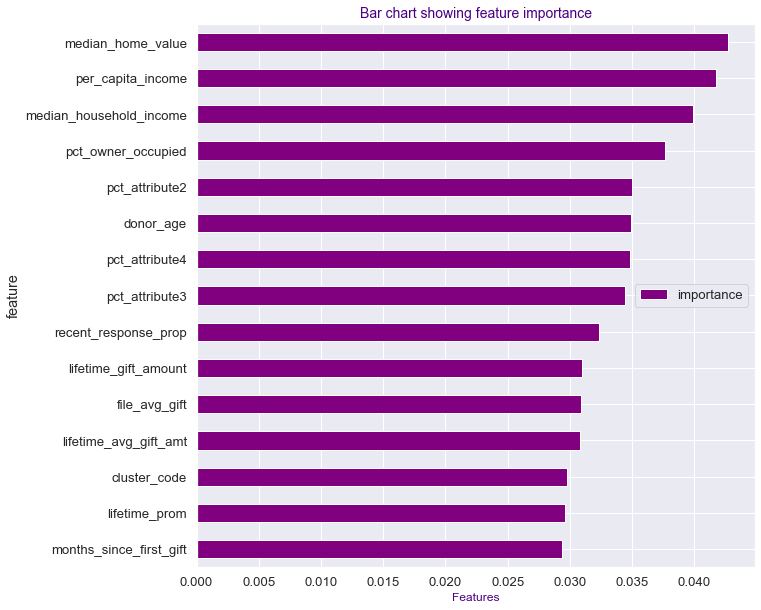

In [71]:
# Creating a bar chart of feature importance in descending order
#
rf_impo_df = rf_impo_df[:15].sort_values(by = 'importance', ascending = True)
rf_impo_df.plot(kind = 'barh', figsize = (10, 10), color = 'purple')
plt.legend(loc = 'center right')
plt.title('Bar chart showing feature importance', color = 'indigo', fontsize = 14)
plt.xlabel('Features', fontsize = 12, color = 'indigo')
plt.show()

In [72]:
rf_impo_df.index

Index(['months_since_first_gift', 'lifetime_prom', 'cluster_code',
       'lifetime_avg_gift_amt', 'file_avg_gift', 'lifetime_gift_amount',
       'recent_response_prop', 'pct_attribute3', 'pct_attribute4', 'donor_age',
       'pct_attribute2', 'pct_owner_occupied', 'median_household_income',
       'per_capita_income', 'median_home_value'],
      dtype='object', name='feature')

### Modelling the undersampled data with the most important features

In [73]:
# Selecting only important features and the y variable
#
X = X_train_cat_encoded[rf_impo_df.index]

y = y


In [74]:
X.shape, y.shape

((9686, 15), (9686,))

In [75]:
# Splitting the data into training and testing sets
#
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 101)

## define and configure the model
model = RandomForestClassifier()

# fit the model
model.fit(X_train, y_train)

# evaluate the model
preds = model.predict(X_test)
print('Accuracy : ',accuracy_score(y_test, preds))

print(f'The accuracy score is: {accuracy_score(y_test, preds)} and the f1 score is {f1_score(y_test, preds)}')
print('\n')
print(f'{classification_report(y_test, preds)}')
confusion_matrix(y_test, preds)



Accuracy :  0.5767377838953889
The accuracy score is: 0.5767377838953889 and the f1 score is 0.5778997940974605


              precision    recall  f1-score   support

           0       0.57      0.58      0.58      1446
           1       0.58      0.58      0.58      1460

    accuracy                           0.58      2906
   macro avg       0.58      0.58      0.58      2906
weighted avg       0.58      0.58      0.58      2906



array([[834, 612],
       [618, 842]], dtype=int64)

### Undersampling leads to a remarkable imporovement in the recall and f1-score

### Parameter Tuning

In [76]:
# Previewing the parameters to tune
#
RandomForestClassifier()


RandomForestClassifier()

In [77]:
# Creating a dictionary of parameters to tune
#
params = {'n_estimators': [10, 20, 30, 50, 100],
         'max_depth': [1, 2, 3, 4, 5]}

# Setting the number of folds to 10 and instantiating the model
# 
kfold = KFold(n_splits=10, shuffle=True)
model = RandomForestClassifier()

search = GridSearchCV(model, param_grid=params, scoring = 'f1', cv = kfold)

# Fitting the grid search with the X and the y variables
#
search.fit(X, y)

# Checking for the best parameters
#
print(f'The best parameters are: {search.best_params_}')

The best parameters are: {'max_depth': 5, 'n_estimators': 50}


In [78]:
X.shape

(9686, 15)

In [79]:
# Applying the best parameters to the model


# Splitting the data into training and testing sets
#
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 101)

## define and configure the model
model = RandomForestClassifier(max_depth = 5, n_estimators = 50)

# fit the model
model.fit(X_train, y_train)

# evaluate the model
preds = model.predict(X_test)
print('Accuracy : ',accuracy_score(y_test, preds))

print(f'The accuracy score is: {accuracy_score(y_test, preds)} and the f1 score is {f1_score(y_test, preds)}')
print('\n')
print(f'{classification_report(y_test, preds)}')
confusion_matrix(y_test, preds)



Accuracy :  0.5815554026152787
The accuracy score is: 0.5815554026152787 and the f1 score is 0.5766016713091923


              precision    recall  f1-score   support

           0       0.58      0.60      0.59      1446
           1       0.59      0.57      0.58      1460

    accuracy                           0.58      2906
   macro avg       0.58      0.58      0.58      2906
weighted avg       0.58      0.58      0.58      2906



array([[862, 584],
       [632, 828]], dtype=int64)

*Parameter tuning hasn't decreased or increased the f1 score*

### Cross Validation to check for the stability of the model

In [80]:
# Performing cross validation of ten folds
#
scores = cross_val_score(model, X, y, scoring = 'f1', cv = 10)

# Calculating the mean of the cross validation scores
#
print(f'Mean of cross validation scores is {scores.mean()}')

# Calculating the variance of the cross validation scores from the mean
#
print(f'Standard deviation of the cross validation scores is {scores.std()}')

Mean of cross validation scores is 0.48770590961457555
Standard deviation of the cross validation scores is 0.0550334983718739


## Challenging the solution

*Using different models to check whether performance can be improved*

In [81]:
X_test_cat_encoded = X_test_cat_encoded[rf_impo_df.index]

In [82]:
X_test_cat_encoded.shape

(2148, 15)

In [ ]:
X_test_cat_encoded.head()

In [83]:
y__ =  y.copy()
total_test_set_prediction = []
kf = KFold(n_splits=5, random_state=False, shuffle=False)
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    rf_model = RandomForestClassifier(random_state=101, max_depth = 5, n_estimators = 50)

    # fit the model
    rf_model.fit(X_train, y_train)
    # evaluate the model
    preds = rf_model.predict(X_test)
    test_preds  = rf_model.predict(X_test_cat_encoded)
    total_test_set_prediction.append(test_preds)
    #arr = np.stack([arr,test_preds],1)
    y__.iloc[test_index] = preds
    print('k-fold Accuracy : ',accuracy_score(y_test, preds))
print('Cross_validation_Accuracy : ',accuracy_score(y__, y))
test_pred_array = np.array(total_test_set_prediction)
test_pred_array_T = test_pred_array.transpose()
final_test_pred  = mode(test_pred_array_T,1)[0]
final_test_pred = final_test_pred.reshape((-1))

SyntaxError: keyword argument repeated (<ipython-input-83-3c9eb81eddb2>, line 7)

In [ ]:
predicted_donors = pd.DataFrame()
predicted_donors['donated'] = final_test_pred
predicted_donors['control_no'] = test_control_no
predicted_donors.head()

In [ ]:
predicted_donors['donated'].value_counts()

## Conclusion

* *Out of all the models used to predict whether a person has donates or not, the RandomForestClassifier performs well with an accuracy score of approximately 74.6%*



